# Decision Tree

Decistion Tree is a tree-based algorithm that uses recursive functions.

Let's take an example of cat classification on behalf of its features, like ear-shaped, face-shaped, and wishers.

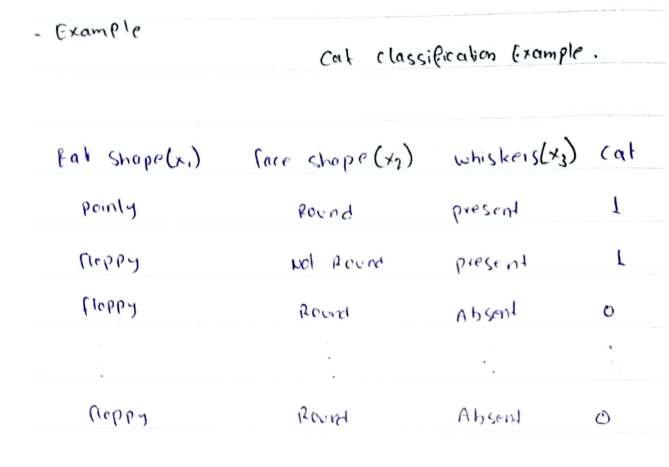

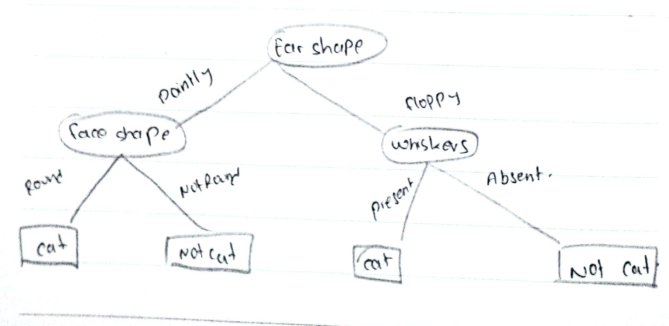

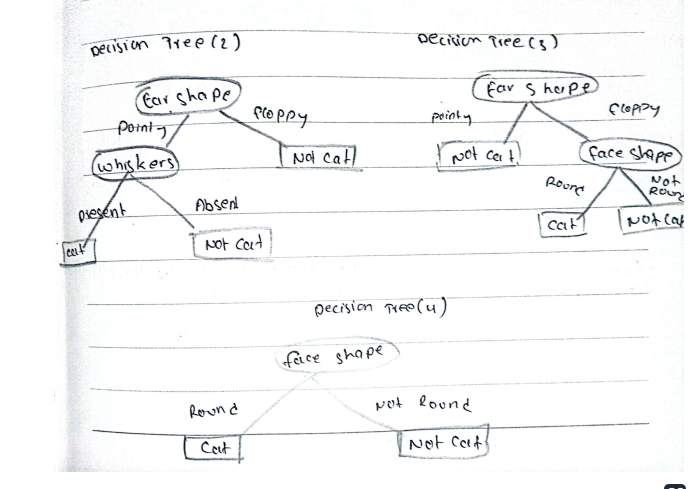

We will make a tree as an example, considering its features like the above picture, and test each feature based on the tree. A prediction has been made. The job of the decision tree algorithm is to find out all possible decision trees and try to pick one that will do well on the training set and then also do well on new data like tests and cross-validation sets.

### Overall process of building decision tree

Decision1:How to choose what featue to split on at each node??
:- 
- maximum purity(or minimum impurity)

Decision 2: When do you stop splitting?
- When a node is 100% one-class
- When splitting a node, it will result in exceeding the maximum depth.
- when improvements in purity score are below a threshold.
- when the number of examples in a node is below a threshold.

### Measuring Purity

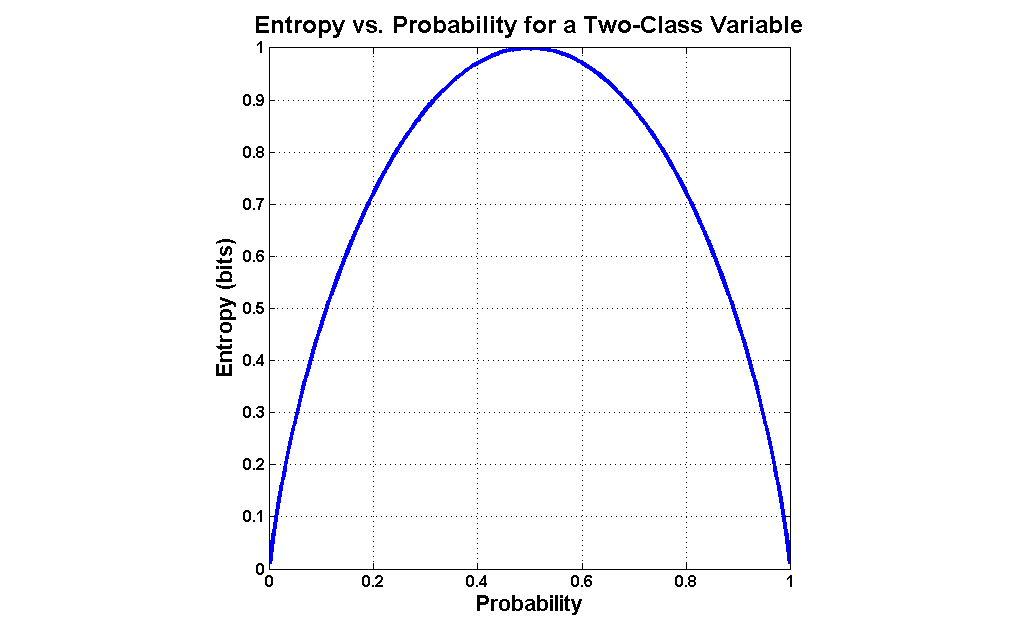

# Entropy as a Measure of Impurity

Entropy is commonly used as a measure of impurity in a dataset. Let \( p_1 \) represent the fraction of examples that belong to one class, where \( p_1 \) is calculated as the number of occurrences of either "yes" or "no" divided by the total count. The complementary fraction \( p_0 \) is given by \( 1 - p_1 \). The entropy function, denoted as \( h(p_1) \), is defined as:

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$



>- 0=Cat
>- X=Not Cat

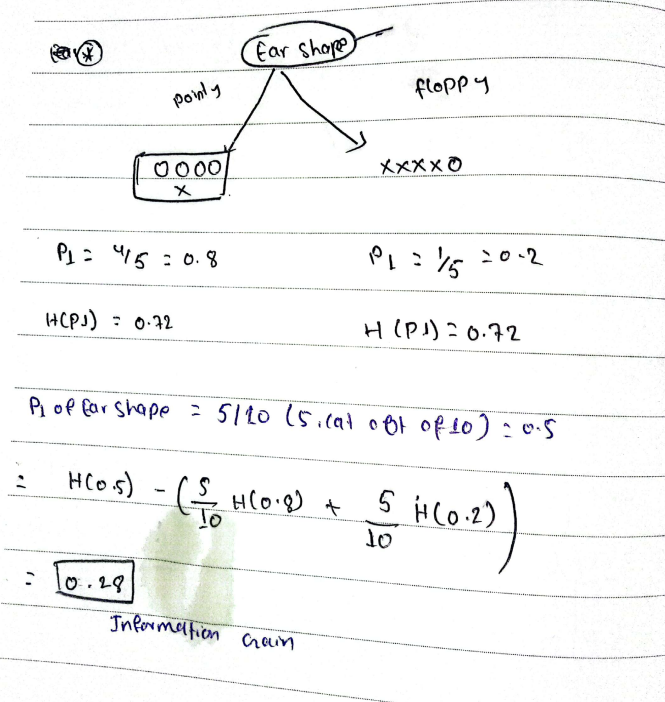
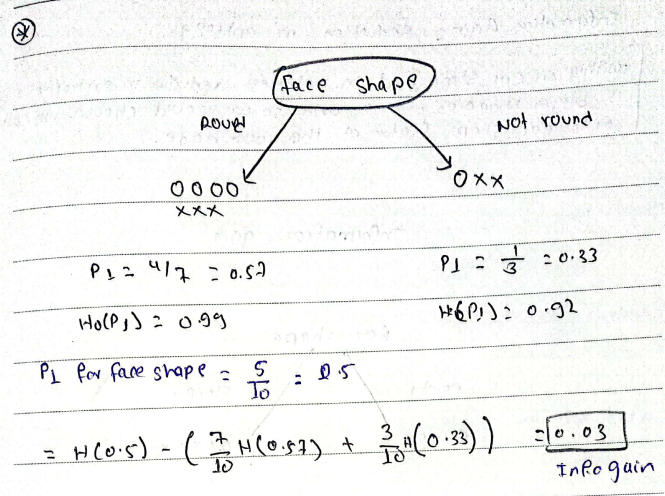
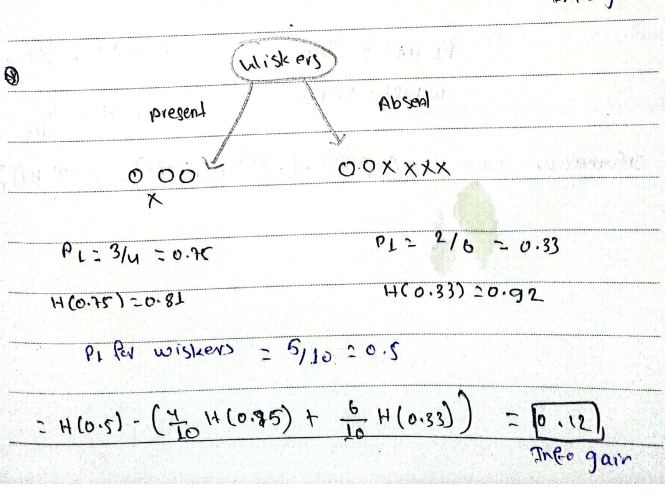

In the above picture, we can see that the information gain of the root node ear shape is higher than the others, so we will choose the first root node as the ear shape.

This function serves as a measure of impurity within a dataset.

To gauge impurity in data, we can utilize different methods such as:
- **Entropy**
- **Gini**


### Information Gain

Information Gain =Reduuction in entrpy

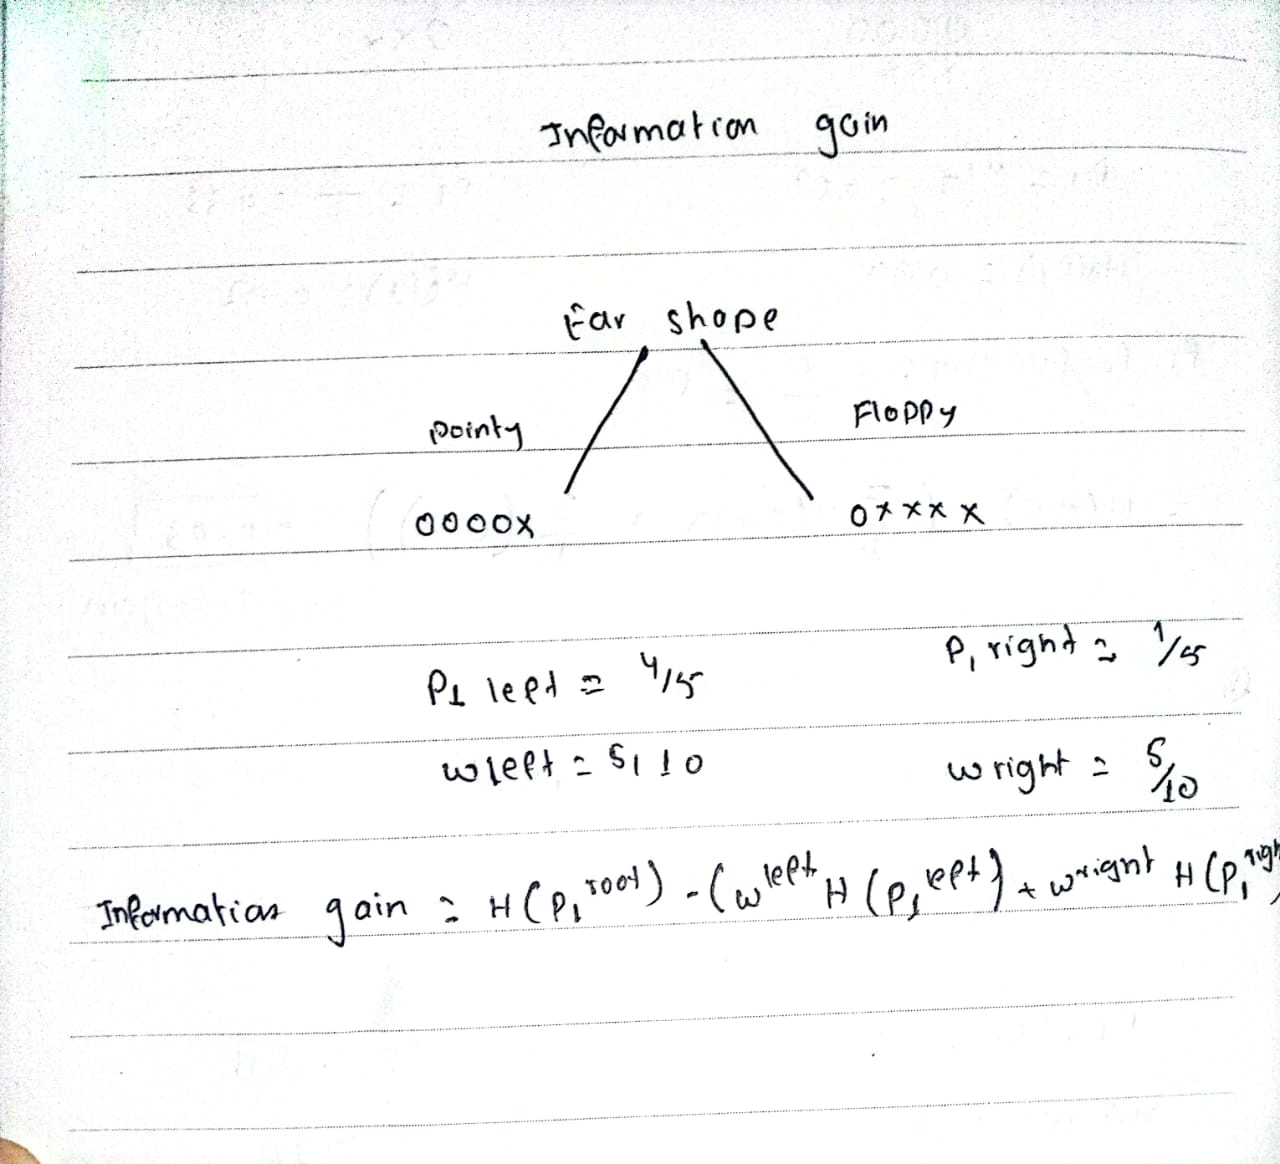

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

# Data Prep and Decision Tree Algo

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [79]:
dataset=pd.read_csv("decision_tree/dataset/drug200.csv")

In [80]:
dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [81]:
cols=["Age","Na_to_K"]
dataset=dataset.drop(cols,axis=1)

In [82]:
dataset.count()

Sex            200
BP             200
Cholesterol    200
Drug           200
dtype: int64

In [83]:
dataset.sample(10)

,Sex,BP,Cholesterol,Drug
138,M,HIGH,NORMAL,drugB
12,M,LOW,HIGH,drugY
63,M,LOW,NORMAL,drugX
185,F,NORMAL,NORMAL,drugY
143,M,HIGH,NORMAL,drugY
73,F,NORMAL,NORMAL,drugY
174,M,HIGH,NORMAL,drugA
89,F,NORMAL,NORMAL,drugY
66,M,HIGH,HIGH,drugA
112,M,LOW,NORMAL,drugX


In [84]:
dataset.isnull().sum()

Sex            0
BP             0
Cholesterol    0
Drug           0
dtype: int64

In [85]:
filtered_dataset = dataset[dataset['Drug'].isin(['drugX', 'drugY'])]


In [86]:
filtered_dataset.count()

Sex            145
BP             145
Cholesterol    145
Drug           145
dtype: int64

In [87]:
filtered_dataset.Drug.unique()

array(['drugY', 'drugX'], dtype=object)

**Lets use one hot encoding to change the categorical feature into numerical feature**

In [88]:
one_hot_encoding=OneHotEncoder()
label_encoder=LabelEncoder()

In [89]:
final_dataset=one_hot_encoding.fit_transform(filtered_dataset)

In [90]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(filtered_dataset['Drug'])

cols_for_ohe = ["Sex", "BP", "Cholesterol"]

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(filtered_dataset[cols_for_ohe])



/home/ishwor/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
X_train=one_hot_encoded

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train)

In [114]:
import numpy as np


class DecisionTreeTry:

    @staticmethod
    def entropy(p):
        """
        Calculate entropy given probability 'p'

        :param p: Probability value
        :return: Entropy value
        """
        if p == 0 or p == 1:
            return 0
        else:
            return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

    @staticmethod
    def split_indices(X, index_feature):
        """
        Split indices of the dataset based on the specified feature

        :param X: Dataset.
        :param index_feature: Index of the feature to split on
        :return: Left and right indices.
        """
        left_indices = [i for i, x in enumerate(X) if x[index_feature] == 1]
        right_indices = [i for i, x in enumerate(X) if x[index_feature] != 1]
        return left_indices, right_indices

    @staticmethod
    def weighted_entropy(X, y, left_indices, right_indices):
        """
        Calculate the weighted entropy for the given dataset and split indices.

        :param X: Dataset
        :param y: Label or Target cols
        :param left_indices: Indices for the left split
        :param right_indices: Indices for the right split
        :return: Weighted entropy value
        """
        w_left = len(left_indices) / len(X)
        w_right = len(right_indices) / len(X)
        p_left = sum(y[left_indices]) / len(left_indices) if len(left_indices) > 0 else 0
        p_right = sum(y[right_indices]) / len(right_indices) if len(right_indices) > 0 else 0

        weighted_entropy = w_left * DecisionTreeTry.entropy(p_left) + w_right * DecisionTreeTry.entropy(p_right)
        return weighted_entropy

    @staticmethod
    def information_gain(X, y, left_indices, right_indices):
        """
        Calculate information gain for the given dataset and split indices

        :param X: Dataset
        :param y: Label
        :param left_indices: Indices for the left split
        :param right_indices: Indices for the right split
        :return: Information gain value
        """
        p_node = sum(y) / len(y) if len(y) > 0 else 0
        h_node = DecisionTreeTry.entropy(p_node)
        w_entropy = DecisionTreeTry.weighted_entropy(X, y, left_indices, right_indices)
        return h_node - w_entropy


index_feature = 2

left_indices, right_indices = DecisionTreeTry.split_indices(X_train, index_feature)

weighted_entropy_value = DecisionTreeTry.weighted_entropy(X_train, y_train, left_indices, right_indices)
information_gain_value = DecisionTreeTry.information_gain(X_train, y_train, left_indices, right_indices)

print("Weighted Entropy: ", weighted_entropy_value)
print("Information Gain: ", information_gain_value)


Weighted Entropy:  0.7353884844354135
Information Gain:  0.18290734961907607


# Scikit-Learn

- Lets use Sckit learn for better visualization and better performance

In [115]:
dtc=DecisionTreeClassifier(random_state=42,criterion="entropy")


In [116]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [117]:
pred=dtc.predict(X_test)

In [118]:
accuracy_score(pred,y_test)

0.7297297297297297

In [119]:
X_train.shape,X_test.shape

((108, 7), (37, 7))

In [120]:
y_test.shape,y_train.shape

((37,), (108,))

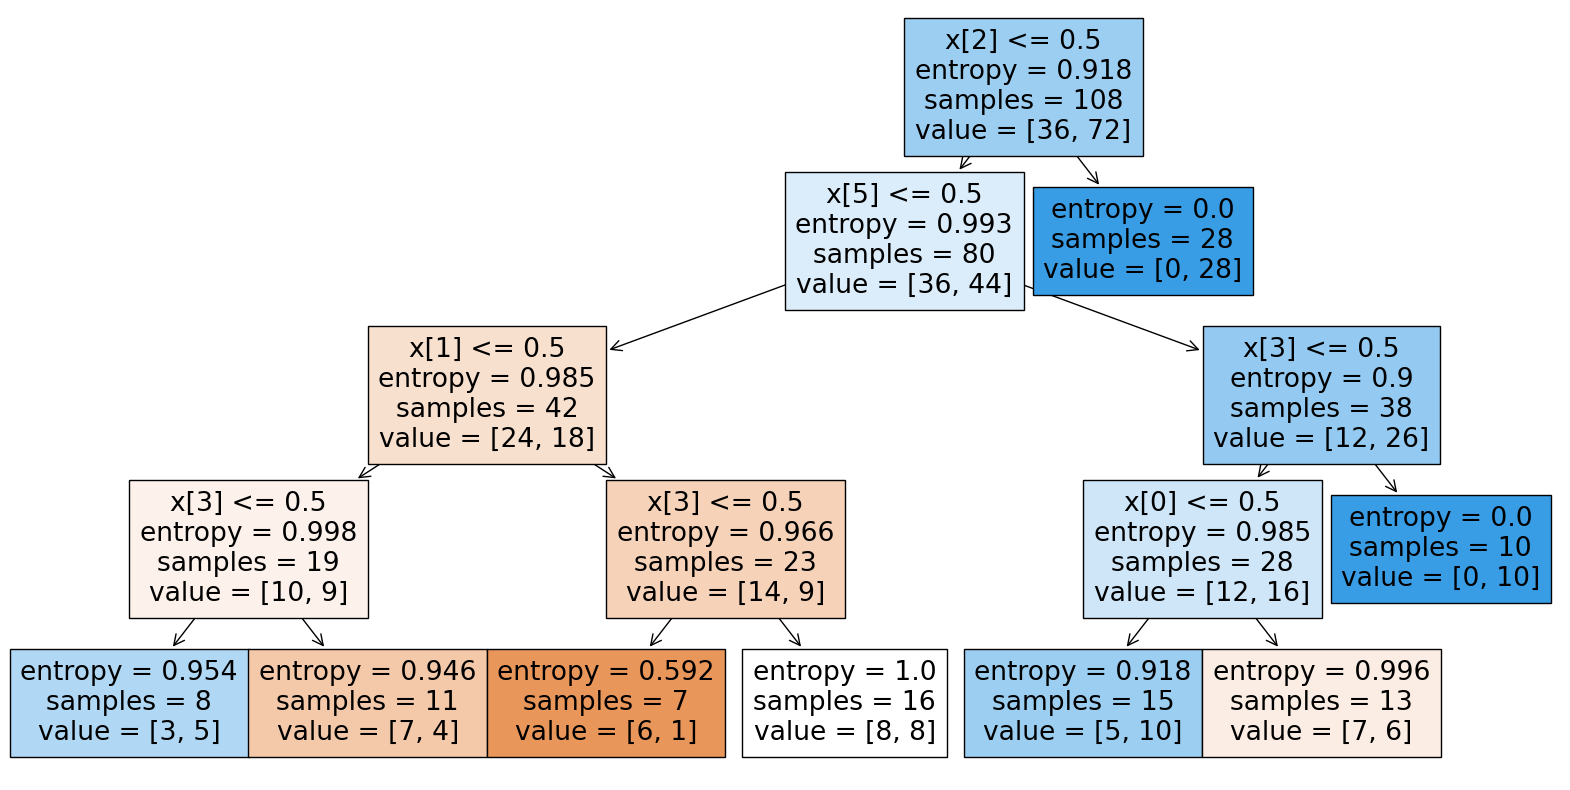

In [121]:
plt.figure(figsize=(20, 10))
plot_tree(dtc, filled=True)
plt.show()